In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU

# visualização

%matplotlib inline

In [2]:
sns.set_style("darkgrid")

# Entendendo o DataSet

In [3]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
train_data = pd.read_csv('Google_Stock_Price_Train.csv')

visualizacao = train_data

In [4]:
visualizacao.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# Vejamos os tipos dos dados do DF


As colunas `Close` é claramente numérico, mas no dataframe está categorizada como `Object`. 

In [5]:
visualizacao.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [6]:
visualizacao['Close'] = visualizacao['Close'].apply(lambda x: pd.to_numeric(x,errors='coerce'))

In [7]:
visualizacao.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

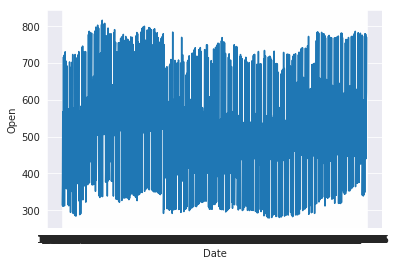

In [8]:
sns.lineplot(x='Date',y='Open',data=visualizacao)

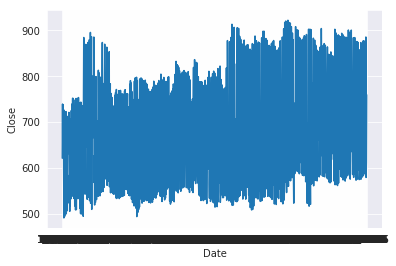

In [9]:
sns.lineplot(x='Date',y='Close',data=visualizacao)

## Vamos transformar os dados de data para colunas de meses e anos para nos informar melhor

In [10]:
visualizacao['Date'] = visualizacao['Date'].apply(pd.to_datetime)

In [11]:
print(
    visualizacao['Date'][0].day,
    visualizacao['Date'][0].month,
    visualizacao['Date'][0].year
) #Agora podemos acessar os att das datas

3 1 2012


In [12]:
visualizacao['ano'] = visualizacao['Date'].apply(lambda x: x.year)
visualizacao['mes'] = visualizacao['Date'].apply(lambda x: x.month)
visualizacao['dia'] = visualizacao['Date'].apply(lambda x: x.day)

In [13]:
visualizacao.head()

,Date,Open,High,Low,Close,Volume,ano,mes,dia
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500",2012,1,3
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400",2012,1,4
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300",2012,1,5
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900",2012,1,6
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800",2012,1,9


# Os dados possuem um desvio padrão muito alto ao longo dos anos

In [14]:
visualizacao[['Open','High','Low','Close']].std()

Open     151.904442
High     153.008811
Low      150.552807
Close    112.582696
dtype: float64

In [15]:
visualizacao[['Open','High','Low','Close']].var()

Open     23074.959474
High     23411.696203
Low      22666.147797
Close    12674.863345
dtype: float64

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


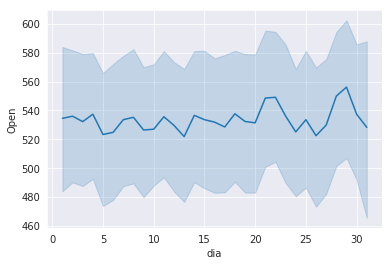

In [16]:
sns.lineplot(x='dia',y='Open', data=visualizacao)

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


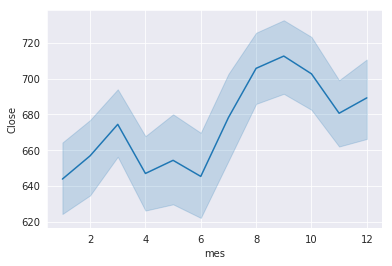

In [17]:
sns.lineplot(x='mes',y='Close', data=visualizacao)

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


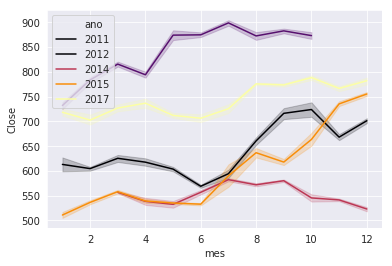

In [18]:
sns.lineplot(
    x='mes',
    y='Close',
    data=visualizacao,
    hue='ano',
    palette='inferno',
)

In [19]:
visualizacao.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ano', 'mes', 'dia'], dtype='object')

# Observando os valores médios para as colunas no péríodo de 60 dias

In [20]:
rolling_60 = visualizacao[['Open','Close','Low','High']].rolling(60, min_periods=1).mean()
rolling_60[['ano', 'mes', 'dia', 'Date']] = visualizacao[['ano', 'mes', 'dia', 'Date']]

# Visualização da informação 

Veja a comparação dos valores com a informação das ultimas 60 cotas (esquerda) e os valores originais (direita). 

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


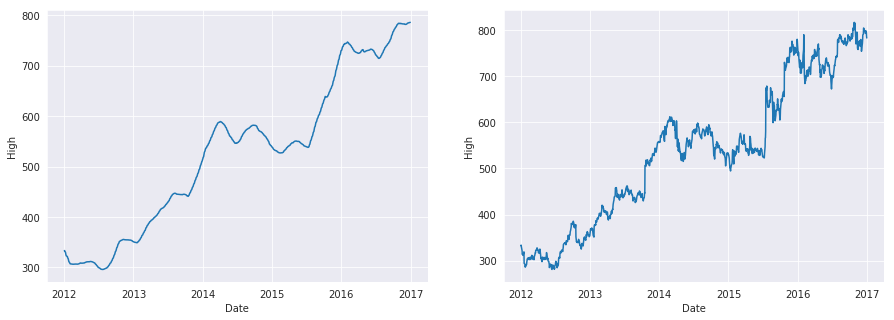

In [21]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(x='Date', y='High', data=rolling_60, ax=ax[0])
sns.lineplot(x='Date', y='High', data=visualizacao, ax=ax[1])
fig.show()

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


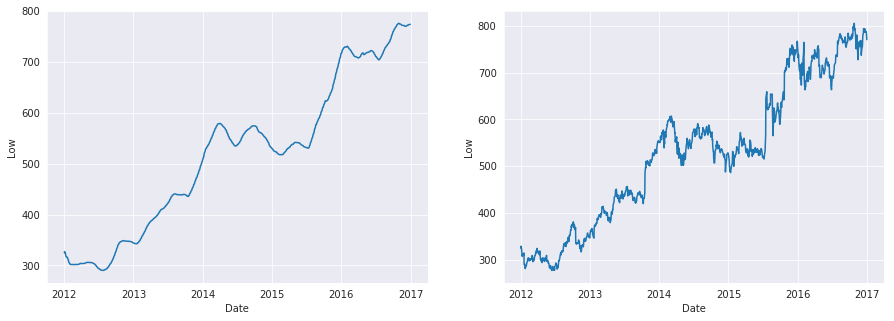

In [22]:
TO_ANALIZE = 'Low'

fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(x='Date', y=TO_ANALIZE, data=rolling_60, ax=ax[0])
sns.lineplot(x='Date', y=TO_ANALIZE, data=visualizacao, ax=ax[1])
fig.show()

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


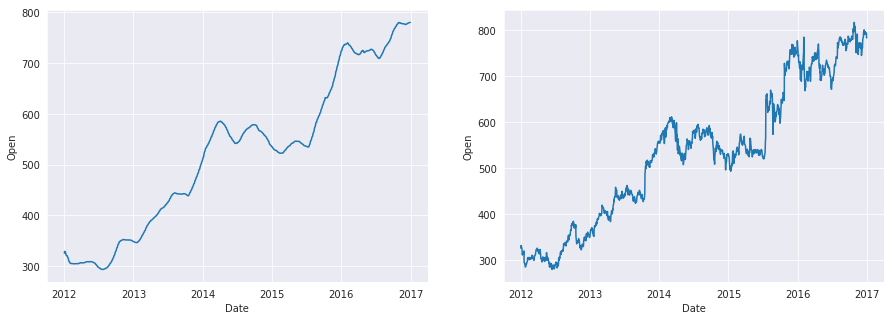

In [23]:
TO_ANALIZE = 'Open'

fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(x='Date', y=TO_ANALIZE, data=rolling_60, ax=ax[0])
sns.lineplot(x='Date', y=TO_ANALIZE, data=visualizacao, ax=ax[1])
fig.show()

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


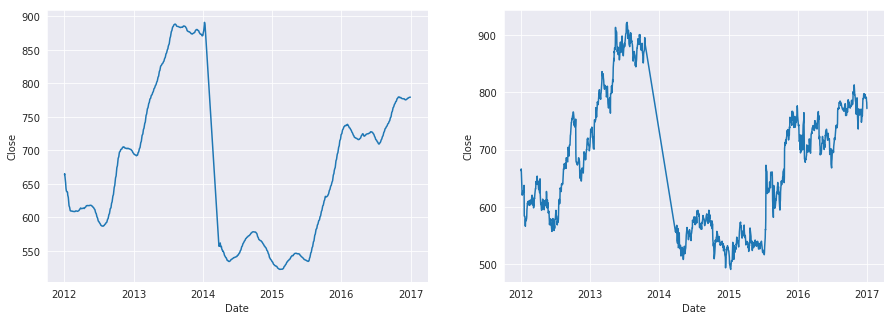

In [24]:
TO_ANALIZE = 'Close'

fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(x='Date', y=TO_ANALIZE, data=rolling_60, ax=ax[0])
sns.lineplot(x='Date', y=TO_ANALIZE, data=visualizacao, ax=ax[1])
fig.show()

In [25]:
train_data.head()

,Date,Open,High,Low,Close,Volume,ano,mes,dia
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500",2012,1,3
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400",2012,1,4
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300",2012,1,5
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900",2012,1,6
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800",2012,1,9


In [53]:
training_set = train_data[['Close','Open']].dropna()
training_set = training_set.reset_index(drop=True)

# Feature Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(training_set)

# Features

In [55]:
features = training_set['Open']
y = training_set['Close']

# Criando inputs

Para cada entrada do dataset, deverão existir 60 colunas. Correspondem aos 60 inputs anteriores.

## Definições


In [84]:
LOOKBACK_UNITS = 60
DATA_SIZE = len(training_set)


x_train = np.array([ training_set['Open'][i-LOOKBACK_UNITS:i].values for i in range(LOOKBACK_UNITS, DATA_SIZE)])
y_train = np.array([ training_set['Open'][i-LOOKBACK_UNITS:i].values for i in range(LOOKBACK_UNITS, DATA_SIZE)])


# Só podeemos pegar informação que possua um número X de dados anteriores
# y_train = np.concatenate(y_train, training_set['Close'][i])


In [86]:
x_train.shape

(1089, 60)

In [101]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1089, 60, 1)

# RNN

In [102]:
regressor = Sequential()

regressor.add(
    LSTM(units = LOOKBACK_UNITS, 
         return_sequences = True, 
         input_shape = (x_train.shape[1], 1)
    )
)
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [103]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [104]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1089/1089 [==============================] - 8s 8ms/sample - loss: 299894.5593
Epoch 2/100
1089/1089 [==============================] - 5s 5ms/sample - loss: 292983.2346
Epoch 3/100
1089/1089 [==============================] - 5s 5ms/sample - loss: 290612.4563
Epoch 4/100
1089/1089 [==============================] - 5s 5ms/sample - loss: 288630.8753
Epoch 5/100
1089/1089 [==============================] - 5s 4ms/sample - loss: 286652.8029
Epoch 6/100
1089/1089 [==============================] - 5s 4ms/sample - loss: 284883.4793
Epoch 7/100
1089/1089 [==============================] - 5s 5ms/sample - loss: 282985.4094
Epoch 8/100
1089/1089 [==============================] - 10s 9ms/sample - loss: 281209.0894
Epoch 9/100
1089/1089 [==============================] - 8s 8ms/sample - loss: 279228.9946
Epoch 10/100
1089/1089 [==============================] - 10s 9ms/sample - loss: 277547.4992
Epoch 11/100
1089/1089 [===============

1089/1089 [==============================] - 10s 9ms/sample - loss: 167347.9094
Epoch 87/100
1089/1089 [==============================] - 10s 9ms/sample - loss: 166274.1156
Epoch 88/100
1089/1089 [==============================] - 11s 10ms/sample - loss: 165779.5476
Epoch 89/100
1089/1089 [==============================] - 10s 10ms/sample - loss: 164357.5877
Epoch 90/100
1089/1089 [==============================] - 11s 10ms/sample - loss: 163546.1390
Epoch 91/100
1089/1089 [==============================] - 10s 9ms/sample - loss: 161979.6235
Epoch 92/100
1089/1089 [==============================] - 10s 9ms/sample - loss: 160847.4867
Epoch 93/100
1089/1089 [==============================] - 10s 9ms/sample - loss: 159617.6703
Epoch 94/100
1089/1089 [==============================] - 9s 8ms/sample - loss: 158353.2639
Epoch 95/100
1089/1089 [==============================] - 10s 9ms/sample - loss: 157378.9085
Epoch 96/100
1089/1089 [==============================] - 10s 9ms/sample - loss: 

# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
